# Configure space

in this section I will create a map for my space including the feasible 0 and infeasible 1 areas, also adding an extra offster for safety.

this section is important because when planning a path, the drone is not just a point but it has a physical space that we should consider to avoid collision

this map derives it's data from collider.csv file which has 6 columns [x, y, z, delta_x , delta_y, delta_z] 

if we assumed drone is cube then, the x, y, z or north, east, altitude are the center of the drone and the height is z+(2*delta_z)

GOAL EXTRACT 2-D MAP


In [1]:
import utm
import googlemaps
from pprint import pprint
import numpy as np

In [1145]:
def get_zed(lat, long):
    
    z=GClient.elevation((lat, long))
    return z[0]['elevation']
    

In [1146]:
def get_map(center_lat, center_long, size, precision):#precision in meters
    #get the latitude precisions from meters to degrees
    #latitudes are parallel equi-distant, 1 degree of latitude =111,320 meters approx.
    lat_precision = precision/ 111320.0
    #get the longitude precisions from meters to degrees
    #longitudes are not parallel, they intersect at poles, distance=0,as they decrese with .cos(latitude) 1 degree of longitude =111,320 x cos(lat.)meters approx.
    long_precision = precision/ (111320.0* np.cos(np.radians(center_lat)))
    
    #as we will generate a map that these center lat and long are in the mid of the map with symmetric 150x150 area
    half_map= size/2
    
    #now derive the rest range of latitudes and longitudes in this map according to the precision we chose
    #note that precision is like the space between each point precision = 100 means each point is 100 meters far from the prev point
    lats = np.arange(center_lat - half_map * lat_precision, center_lat + half_map * lat_precision, lat_precision) 
    #array (start, stop, step)
    longs = np.arange(center_long - half_map * long_precision, center_long + half_map * long_precision, long_precision)
    makan = [(lat, long) for lat in lats for long in longs]
    return makan

    

In [1147]:
api='**************'
GClient=googlemaps.Client(api)

center_lat=30.173416 
center_long =31.431209
makan= get_map(center_lat, center_long,150, 3)
collider = np.zeros((len(makan), 7))

In [1116]:
get_zed(30.173374, 31.431200), get_zed(30.173863, 31.431672)

(40.89016342163086, 40.97298812866211)

(40.89016342163086, 40.97298812866211)

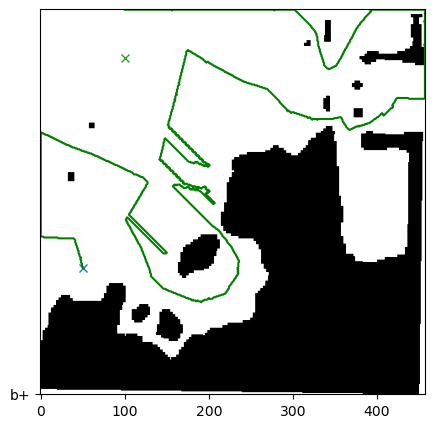

In [116]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.

plt.plot(start[1], start[0], 'x', 'b+')
plt.plot(goal[1], goal[0], 'x', 'b+')
pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')

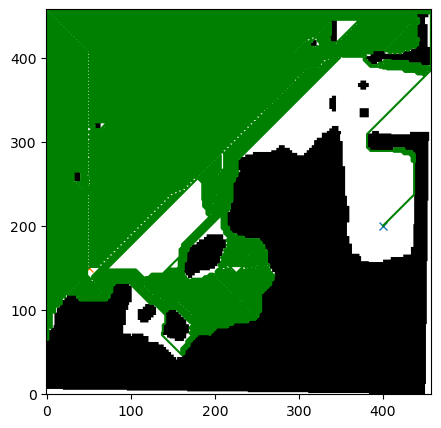

In [36]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.

plt.plot(start[1], start[0], 'x')
plt.plot(goal[1], goal[0], 'x')
pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')